In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import keras


In [2]:
import os

directorio = '../Faces'
nombres_carpetas = [nombre for nombre in os.listdir(
    directorio) if os.path.isdir(os.path.join(directorio, nombre))]

diccionario_carpetas = {}

for i, nombre in enumerate(nombres_carpetas):
    diccionario_carpetas[i] = nombre

print(diccionario_carpetas)


{0: 'abigail_williams_(fate)', 1: 'aegis_(persona)', 2: 'aisaka_taiga', 3: 'albedo', 4: 'anastasia_(idolmaster)', 5: 'aqua_(konosuba)', 6: 'arcueid_brunestud', 7: 'asia_argento', 8: 'astolfo_(fate)', 9: 'asuna_(sao)', 10: 'atago_(azur_lane)', 11: 'ayanami_rei', 12: 'belfast_(azur_lane)', 13: 'bremerton_(azur_lane)', 14: 'c.c', 15: 'chitanda_eru', 16: 'chloe_von_einzbern', 17: 'cleveland_(azur_lane)', 18: 'd.va_(overwatch)', 19: 'dido_(azur_lane)', 20: 'emilia_rezero', 21: 'enterprise_(azur_lane)', 22: 'formidable_(azur_lane)', 23: 'fubuki_(one-punch_man)', 24: 'fujibayashi_kyou', 25: 'fujiwara_chika', 26: 'furukawa_nagisa', 27: 'gawr_gura', 28: 'gilgamesh', 29: 'giorno_giovanna', 30: 'hanekawa_tsubasa', 31: 'hatsune_miku', 32: 'hayasaka_ai', 33: 'hirasawa_yui', 34: 'hyuuga_hinata', 35: 'ichigo_(darling_in_the_franxx)', 36: 'illyasviel_von_einzbern', 37: 'irisviel_von_einzbern', 38: 'ishtar_(fate_grand_order)', 39: 'isshiki_iroha', 40: 'jonathan_joestar', 41: 'kamado_nezuko', 42: 'kanam

In [3]:
def predict(img_rel_path, model):

    loaded_model = keras.models.load_model(model)

    img_real = image.load_img(img_rel_path)

    img = image.load_img(img_rel_path, target_size=(96, 96))

    img = image.img_to_array(img, dtype=np.uint8)

    img = np.array(img)/255.0

    p = loaded_model.predict(img[np.newaxis, ...])

    labels = diccionario_carpetas

    predicted_class = labels[np.argmax(p[0], axis=-1)]

    classes = []
    prob = []

    # Obtener los 5 resultados con mayor porcentaje de similitud
    for i, j in enumerate(p[0], 0):
        classes.append(labels[i])
        prob.append(round(j * 100, 2))
    sorted_probs = sorted(zip(classes, prob), key=lambda x: x[1], reverse=True)
    top_classes = [item[0] for item in sorted_probs[:5]]
    top_probs = [item[1] for item in sorted_probs[:5]]
    print("Top 5:")
    for i in range(5):
        print(f"{top_classes[i]} - {top_probs[i]}%")
    plt.title("Es " + predicted_class)
    plt.axis('off')
    plt.imshow(img_real)
    plt.show()

    def plot_bar_x():
        index = np.arange(len(top_classes))
        plt.bar(index, top_probs)
        plt.xlabel('Personaje', fontsize=8)
        plt.ylabel('Probabilidad', fontsize=8)
        plt.xticks(index, top_classes, fontsize=8, rotation=20)
        plt.title('Gráfico de probabilidades')
        plt.show()

    plot_bar_x()


1/1 [==============================] - 0s 338ms/step
Top 5:
asuna_(sao) - 9.94%
sakurajima_mai - 9.01%
misaka_mikoto - 5.11%
nami_(one_piece) - 4.67%
platelet_(hataraku_saibou) - 4.63%


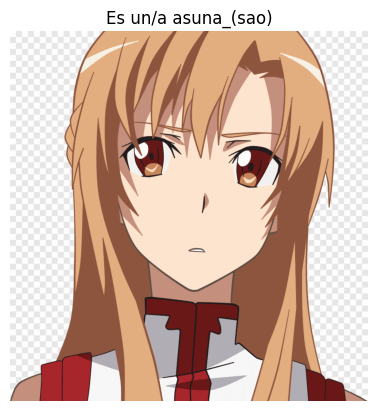

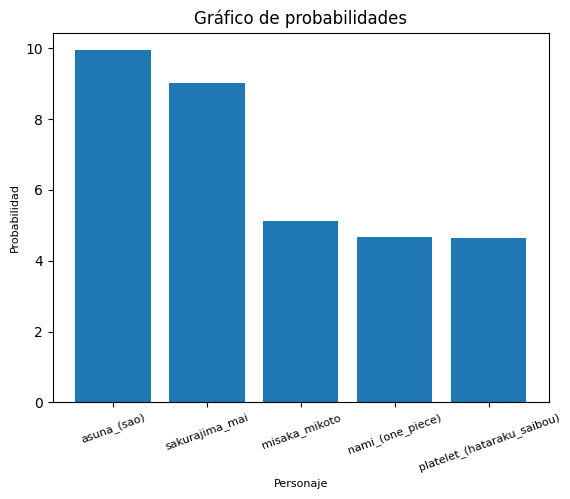

In [4]:
img_face = "../ImagenesPrueba/asuna.png" #Imagen a clasificar
n_model = "../Modelos/model3.h5" #Modelo a usar

predict(img_face, n_model)
